In [1]:
import os
#os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.6.0-spark2.3-s_2.11 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.7.0-spark2.3-s_2.11 pyspark-shell'
#os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.8.0-spark3.0-s_2.12 pyspark-shell'

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import udf
import matplotlib.pyplot as plt

In [2]:
sc = pyspark.SparkContext("local[*]")
spark = SparkSession.builder.appName('notebook').getOrCreate()

In [3]:
from graphframes import *
import hashlib
from pyspark.sql.types import * 

In [4]:
def create_transport_graph(): 
    node_fields = [
            StructField("id", StringType(), True),
            StructField("latitude", FloatType(), True),
            StructField("longitude", FloatType(), True),
            StructField("population", IntegerType(), True)
    ]
    nodes = spark.read.csv("../data/transport-nodes.csv", header=True,schema=StructType(node_fields))
    rels = spark.read.csv("../data/transport-relationships.csv", header=True) 
    reversed_rels = (rels.withColumn("newSrc", rels.dst)
    .withColumn("newDst", rels.src)
    .drop("dst", "src") .withColumnRenamed("newSrc", "src") .withColumnRenamed("newDst", "dst") .select("src", "dst", "relationship", "cost"))
    relationships = rels.union(reversed_rels) 
    return GraphFrame(nodes, relationships)


In [5]:
g = create_transport_graph()

In [6]:
g

GraphFrame(v:[id: string, latitude: float ... 2 more fields], e:[src: string, dst: string ... 2 more fields])

#### **Undirected Graphs** 

In [7]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(121)
    pos = nx.spring_layout(Gplot, k=0.1)
    nx.draw(Gplot, pos, with_labels=True, font_weight='bold',  node_size=6600, node_color='#A0CBE2')
    limits=plt.axis('off') # turn of axis
    
    
#nx.draw_networkx(G, pos = pos, with_labels=False, 
#                 node_size=15, width=0.3, node_color='blue', edge_color='grey')


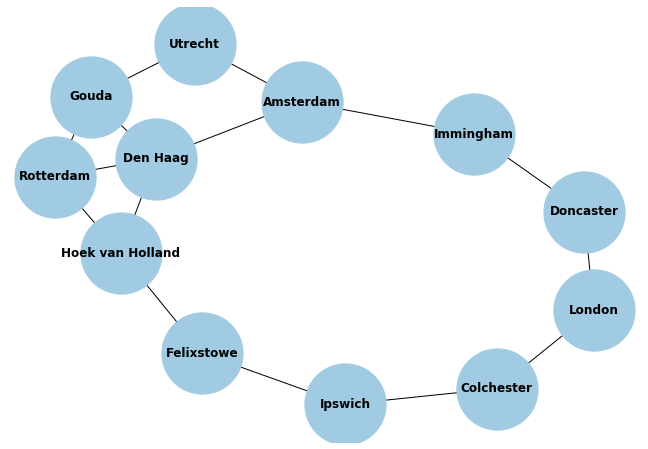

In [8]:
plt.figure(figsize=(25, 8))
import matplotlib.pyplot as plt
import networkx as nx
PlotGraph(g.edges)

In [24]:
def PlotGraph_v2(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(121)
    pos = nx.spring_layout(Gplot, k=0.1)
    
    betCent = nx.betweenness_centrality(Gplot, normalized=True, endpoints=True)
    node_color = [20000.0 * Gplot.degree(v) for v in Gplot]
    node_size =  [v * 10000 for v in betCent.values()]
    nx.draw(Gplot, pos, with_labels=True, font_weight='bold',  
            node_size= node_size, 
            node_color= node_color,    alpha= .85)
    limits=plt.axis('off') # turn of axis
    
#plt.savefig("labels_and_colors.png") # save as png    

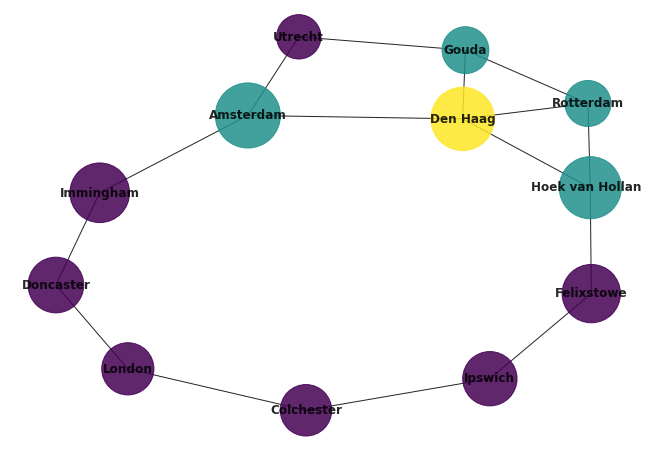

In [26]:
plt.figure(figsize=(25, 8))
PlotGraph_v2(g.edges)

### Colored graph

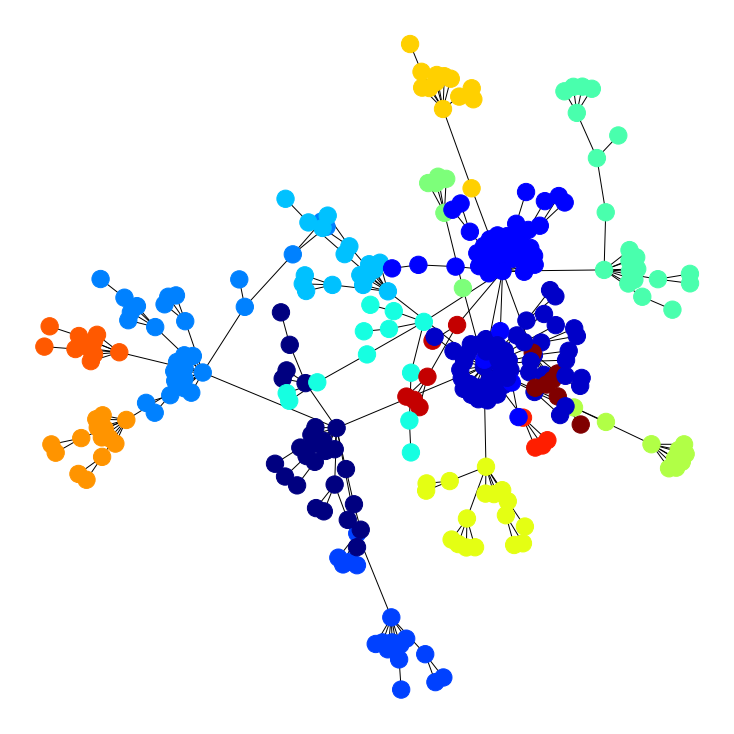

In [13]:
import networkx as nx
import community

plt.figure(figsize=(10, 10))
G = nx.random_graphs.powerlaw_cluster_graph(300, 1, .4)

part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=300, 
               with_labels=False)
limits=plt.axis('off') # turn of axis

## **Directed graphs**

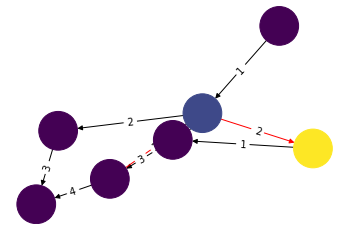

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()

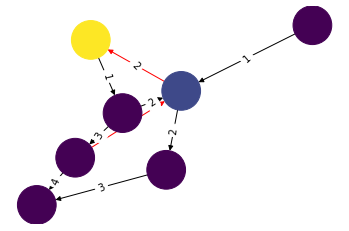

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()

In [5]:
#use options =)
nx.draw_networkx(G[pos, arrows, with_labels])
nx.draw_networkx(G, arrows=True, **options)
options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
G = nx.DiGraph(directed=True)

NameError: name 'arrows' is not defined

### References:
* More options to graph: https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html

In [ ]:
https://app.dominodatalab.com/u/LeJit/FacebookNetwork/view/SocialNetwork.ipynb